In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# percentage

In [7]:
# PATH = '../bmat_info_tsv/293T-bat_GBEmini-AP-RNF2-All-PD_rep1_hg38.MAPQ20.tsv'
PATH = '../bmat_info_tsv/293T-bat_GBEmini-dU-RNF2-All-PD_rep1_hg38.MAPQ20.tsv'


df = pd.read_csv(PATH, sep='\t')
df.head()

,chr,AC,GT,mutation_all,AG,CA,CG,GC,AT,GA,TG,CT,TC,TA
0,chr1,140772,741013,10301782,498085,738155,129712,131716,221973,3413140,140674,3427657,498992,219893
1,chr2,104010,558803,7863467,374699,559150,96315,96576,164453,2632994,103935,2631447,376093,164992
2,chr3,104127,522244,7397201,355033,517981,92572,91556,173148,2466769,104606,2440705,363033,165427
3,chr4,83871,413732,5931678,300276,413722,75316,75449,140420,1951309,84423,1954106,302758,136296
4,chr5,81895,427199,6035209,289141,428396,72206,71871,130798,2014218,83440,2017487,289943,128615


In [8]:
ls_base = 'AGCT'
df_fbase2tbase = pd.DataFrame(np.zeros((4,4)), columns = [i for i in ls_base])
df_fbase2tbase.index = [i for i in ls_base[::-1]]
df_fbase2tbase

ls_df_chroms = []

for chroms in ['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]:
    df_this_chr = df.loc[df.chr==chroms,:]
    df_base = df_fbase2tbase.copy()

    for i in ls_base:
        for j in ls_base:
            if i!=j:
                df_base.loc[i,j] = df_this_chr.loc[:,i+j].values[0]/df_this_chr['mutation_all'].values[0] * 100
    ls_df_chroms.append([chroms,df_base])
dict_chroms_info = {}
for chroms in ['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]:
    for index,chroms_check in enumerate(ls_df_chroms):
        if chroms_check[0] == chroms:
            dict_chroms_info[chroms] = ls_df_chroms[index][1].values.tolist()
dict_chroms_info

{'chr1': [[2.1345142034649927, 1.3655307402156247, 4.843744509445065, 0.0],
  [7.165313729216945, 1.259121965500726, 0.0, 33.272466841173696],
  [33.13154947367358, 0.0, 1.2785749106319664, 7.193056502263396],
  [0.0, 4.834940207432074, 1.3664820319435995, 2.154704885038336]],
 'chr2': [[2.0982093521852385, 1.3217452301891772, 4.78278855878711, 0.0],
  [7.110731182568706, 1.2248414090120807, 0.0, 33.46420859908231],
  [33.48388185516643, 0.0, 1.2281605556429498, 7.1063183707644475],
  [0.0, 4.765061009348676, 1.3226990079566685, 2.091354869296202]],
 'chr3': [[2.2363458827196934, 1.4141294795152923, 4.907707658613035, 0.0],
  [7.002391850647292, 1.2514463240893412, 0.0, 32.99498012829447],
  [33.34732961832455, 0.0, 1.2377113992170823, 7.06002175687804],
  [0.0, 4.799558643870837, 1.4076540572576033, 2.340723200572757]],
 'chr4': [[2.2977646460242784, 1.4232566231680142, 5.104086904245308, 0.0],
  [6.9747885842758155, 1.2697250255324042, 0.0, 32.94356167007042],
  [32.89640806530631, 0

0 chr1 0 0
1 chr2 1 0
2 chr3 2 0
3 chr4 3 0
4 chr5 4 0
5 chr6 0 1
6 chr7 1 1
7 chr8 2 1
8 chr9 3 1
9 chr10 4 1
10 chr11 0 2
11 chr12 1 2
12 chr13 2 2
13 chr14 3 2
14 chr15 4 2
15 chr16 0 3
16 chr17 1 3
17 chr18 2 3
18 chr19 3 3
19 chr20 4 3
20 chr21 0 4
21 chr22 1 4
22 chrX 2 4
23 chrY 3 4
24 chrM 4 4


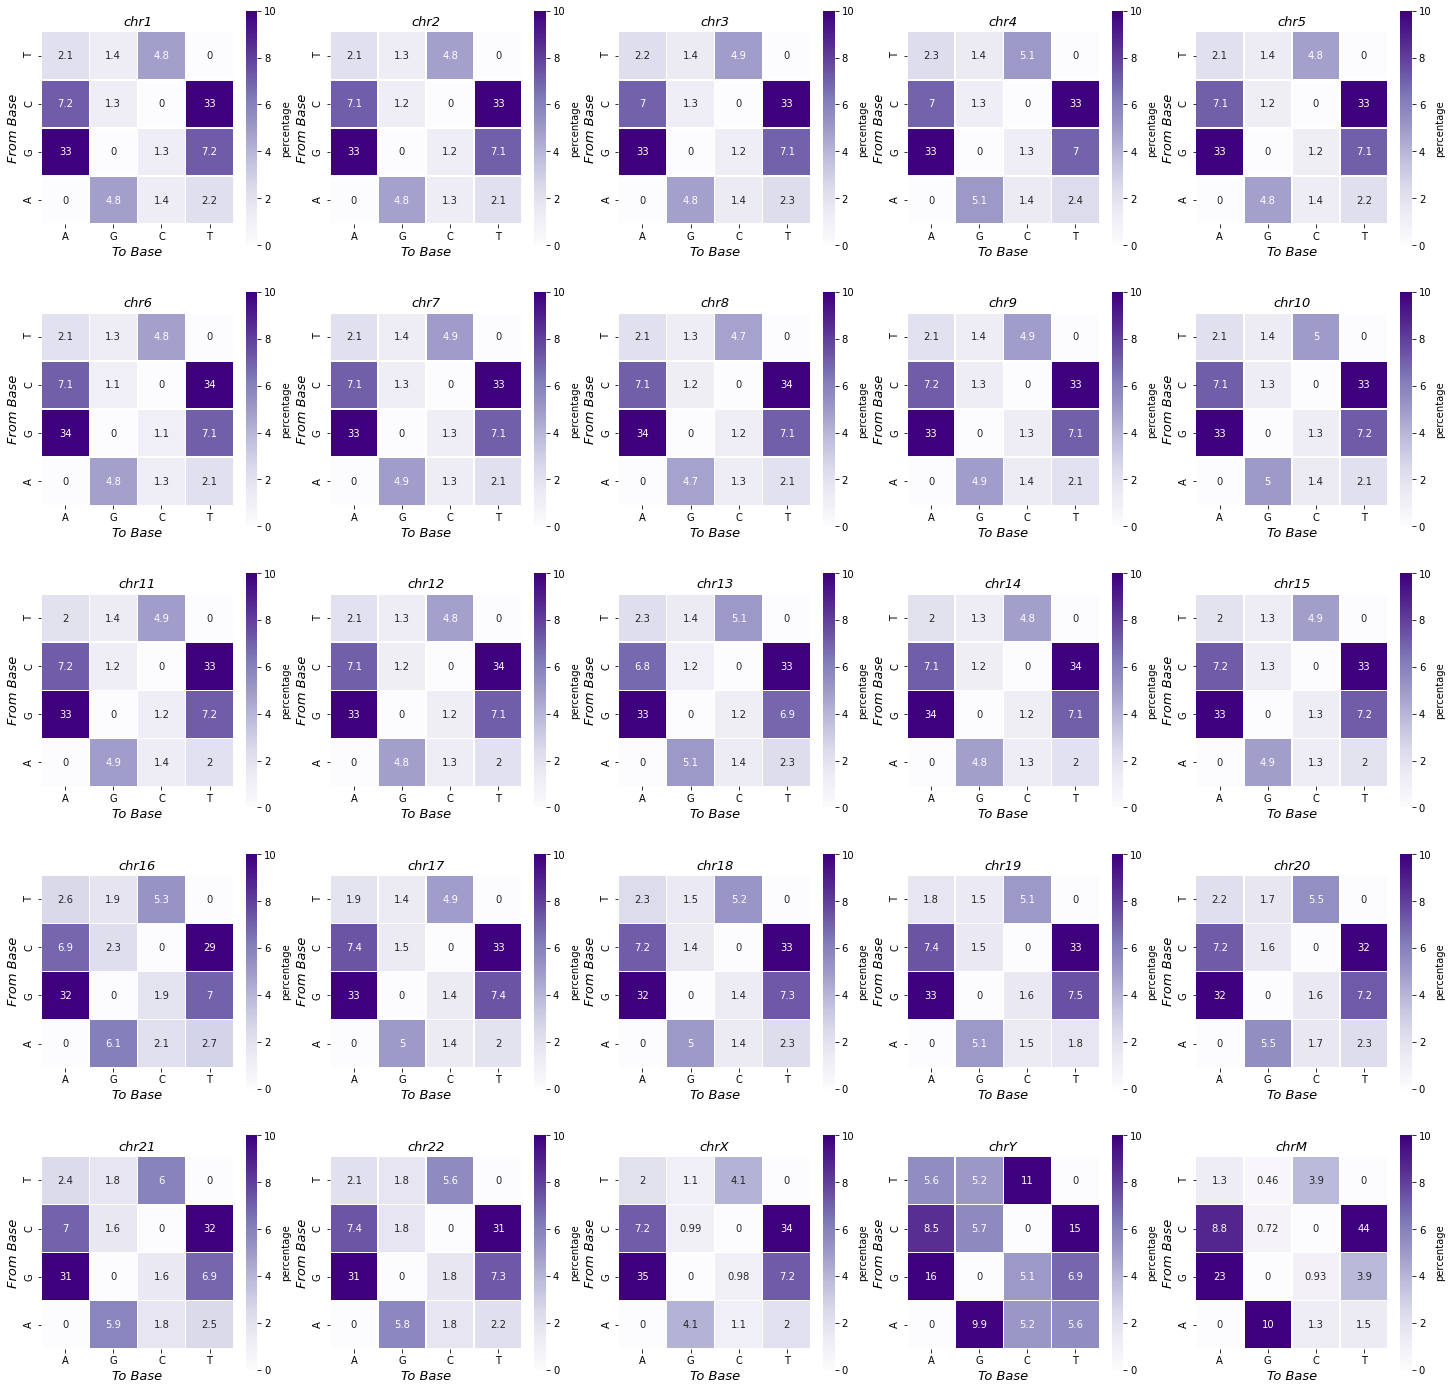

In [9]:
fig,ax = plt.subplots(5,5,figsize=(5*5,5*5))

for index,chroms in enumerate(['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]):
    # plot
    data = pd.DataFrame(dict_chroms_info[chroms])
    data.index = df_fbase2tbase.index.values
    data.columns = df_fbase2tbase.columns.values
    
    print(index,chroms,index%5,int(index/5))
    row = int(index/5)
    col = index%5
    sns.heatmap(
                data, 
                vmin = 0,
                vmax = 10,
                linewidths = 0.5,
                square = True,
                annot= dict_chroms_info[chroms],
        #         annot= True,
    #             fmt = "d",
                ax = ax[row,col],
                cmap = 'Purples',
                cbar_kws={"orientation":"vertical","label": "percentage"}
            )
    ax[row,col].set_xlabel('To Base', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
    ax[row,col].set_ylabel('From Base', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
    ax[row,col].set_title(chroms,fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
# data
plt.savefig(PATH+'.pdf')

# count

In [238]:
import json
cmd = 'samtools idxstats ../bam/293T-bat_GBEmini-AP-RNF2-All-PD_rep1_bwa_hg38_sort_rmdup_MAPQ20.bam'
cmd_return1 = os.popen(cmd).read()
cmd = 'samtools idxstats ../bam/293T-bat_GBEmini-dU-RNF2-All-PD_rep1_bwa_hg38_sort_rmdup_MAPQ20.bam'
cmd_return2 = os.popen(cmd).read()

In [239]:
ls_cmd1 = [i.split('\t') for i in cmd_return1.split('\n')][:-2]
ls_cmd2 = [i.split('\t') for i in cmd_return2.split('\n')][:-2]
ls_AP_chr_length = [int(i[1]) for i in ls_cmd1]
ls_dU_chr_length = [int(i[1]) for i in ls_cmd2]
ls_AP_reads_count = [int(i[2]) for i in ls_cmd1]
ls_dU_reads_count = [int(i[2]) for i in ls_cmd2]
# reads_count_AP = sum(ls_AP_reads_count)
# reads_count_dU = sum(ls_dU_reads_count)

In [240]:
PATH = '../bmat_info_tsv/293T-bat_GBEmini-dU-RNF2-All-PD_rep1_hg38.MAPQ20.tsv.bak'
df_dU = pd.read_csv(PATH,sep='\t')
PATH = '../bmat_info_tsv/293T-bat_GBEmini-AP-RNF2-All-PD_rep1_hg38.MAPQ20.tsv.bak'
df_AP = pd.read_csv(PATH,sep='\t')
df_dU = df_dU.set_index('chr')
df_AP = df_AP.set_index('chr')
df_dU['reads_count'] = ls_dU_reads_count
df_dU['chr_length'] = ls_dU_chr_length
df_AP['reads_count'] = ls_AP_reads_count
df_AP['chr_length'] = ls_AP_chr_length

for index,chroms in enumerate(['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]):
    df_dU.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']] = df_dU.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']].map(lambda x: x/df_dU.loc[chroms,'reads_count']*df_dU.loc[chroms,'chr_length'])
df_dU_nor = df_dU.copy()

for index,chroms in enumerate(['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]):
    df_AP.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']] = df_AP.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']].map(lambda x: x/df_AP.loc[chroms,'reads_count']*df_AP.loc[chroms,'chr_length'])
df_dU_nor = df_dU.copy()
df_AP_nor = df_AP.copy()

In [241]:
df_dU_nor

,AC,GT,mutation_all,AG,CA,CG,GC,AT,GA,TG,CT,TC,TA,reads_count,chr_length
chr,,,,,,,,,,,,,,,
chr1,3.222734e+06,1.696423e+07,2.358417e+08,1.140281e+07,1.689880e+07,2.969535e+06,3.015413e+06,5.081693e+06,7.813801e+07,3.220491e+06,7.847035e+07,1.142357e+07,5.034075e+06,10874645,248956422
chr2,2.977856e+06,1.599880e+07,2.251348e+08,1.072781e+07,1.600873e+07,2.757544e+06,2.765017e+06,4.708368e+06,7.538387e+07,2.975709e+06,7.533958e+07,1.076772e+07,4.723800e+06,8459291,242193529
chr3,2.627841e+06,1.317981e+07,1.866823e+08,8.959928e+06,1.307223e+07,2.336229e+06,2.310588e+06,4.369717e+06,6.225357e+07,2.639930e+06,6.159580e+07,9.161823e+06,4.174863e+06,7857370,198295559
chr4,2.565903e+06,1.265749e+07,1.814705e+08,9.186477e+06,1.265718e+07,2.304176e+06,2.308245e+06,4.295931e+06,5.969726e+07,2.582790e+06,5.978283e+07,9.262410e+06,4.169764e+06,6217494,190214555
chr5,2.293700e+06,1.196491e+07,1.690330e+08,8.098207e+06,1.199843e+07,2.022332e+06,2.012949e+06,3.663366e+06,5.641384e+07,2.336972e+06,5.650540e+07,8.120669e+06,3.602225e+06,6481701,181538259
chr6,1.991527e+06,1.114617e+07,1.575455e+08,7.541115e+06,1.114837e+07,1.799675e+06,1.799651e+06,3.269049e+06,5.305701e+07,2.032165e+06,5.296612e+07,7.534297e+06,3.260370e+06,7065430,170805979
chr7,2.012406e+06,1.056945e+07,1.491886e+08,7.325421e+06,1.055085e+07,1.882706e+06,1.879765e+06,3.095998e+06,4.963479e+07,2.014829e+06,4.974369e+07,7.378167e+06,3.100546e+06,5851696,159345973
chr8,1.736694e+06,9.542709e+06,1.343273e+08,6.344336e+06,9.499220e+06,1.623946e+06,1.653695e+06,2.764759e+06,4.517789e+07,1.763397e+06,4.509663e+07,6.336751e+06,2.787234e+06,4668989,145138636
chr9,1.800026e+06,9.291859e+06,1.307195e+08,6.419019e+06,9.361788e+06,1.732257e+06,1.755973e+06,2.694781e+06,4.338197e+07,1.771609e+06,4.339182e+07,6.430233e+06,2.688129e+06,3974023,138394717


In [242]:
df_dU_nor['Sample'] = 'dU'
df_AP_nor['Sample'] = 'AP'
df_merge_nor = pd.concat([df_dU_nor,df_AP_nor],axis=0)
df_merge_nor.reset_index(inplace=True)
df_merge_nor = df_merge_nor[['Sample','chr','AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']]
df_merge_nor.sort_values(['chr','Sample'],inplace=True)
df_merge_nor.reset_index(inplace=True)
df_merge_nor.drop('index',axis=1,inplace=True)
df_former = df_merge_nor[['Sample','chr']]
df_later = df_merge_nor.iloc[:,2:]
rep = len(df_later.values[0])
ls_b2b = df_later.columns
ls_all = []
for index, line in enumerate(df_former.values.tolist()):
    ls_temp = []
    info = df_later.values.tolist()[index]
    for i in range(rep):
        ls_temp.append(line + [ls_b2b[i]] + [info[i]])
    ls_all.extend(ls_temp)
# ls_all

In [251]:
df_final = pd.DataFrame(ls_all,columns=['Sample','Chr','Mutation','NormCounts'])
df_final.Mutation = df_final.Mutation.map(lambda x: 'ALL' if x=='mutation_all' else x)
df_final

,Sample,Chr,Mutation,NormCounts
0,AP,chr1,AC,2.934693e+06
1,AP,chr1,AG,1.002606e+07
2,AP,chr1,AT,4.212057e+06
3,AP,chr1,CA,1.377819e+07
4,AP,chr1,CG,2.725410e+06
...,...,...,...,...
645,dU,chrY,GT,2.264383e+07
646,dU,chrY,TA,1.828510e+07
647,dU,chrY,TC,3.467709e+07
648,dU,chrY,TG,1.694871e+07


In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

In [253]:
sns.set(style="whitegrid")
# g = sns.barplot(df_final)

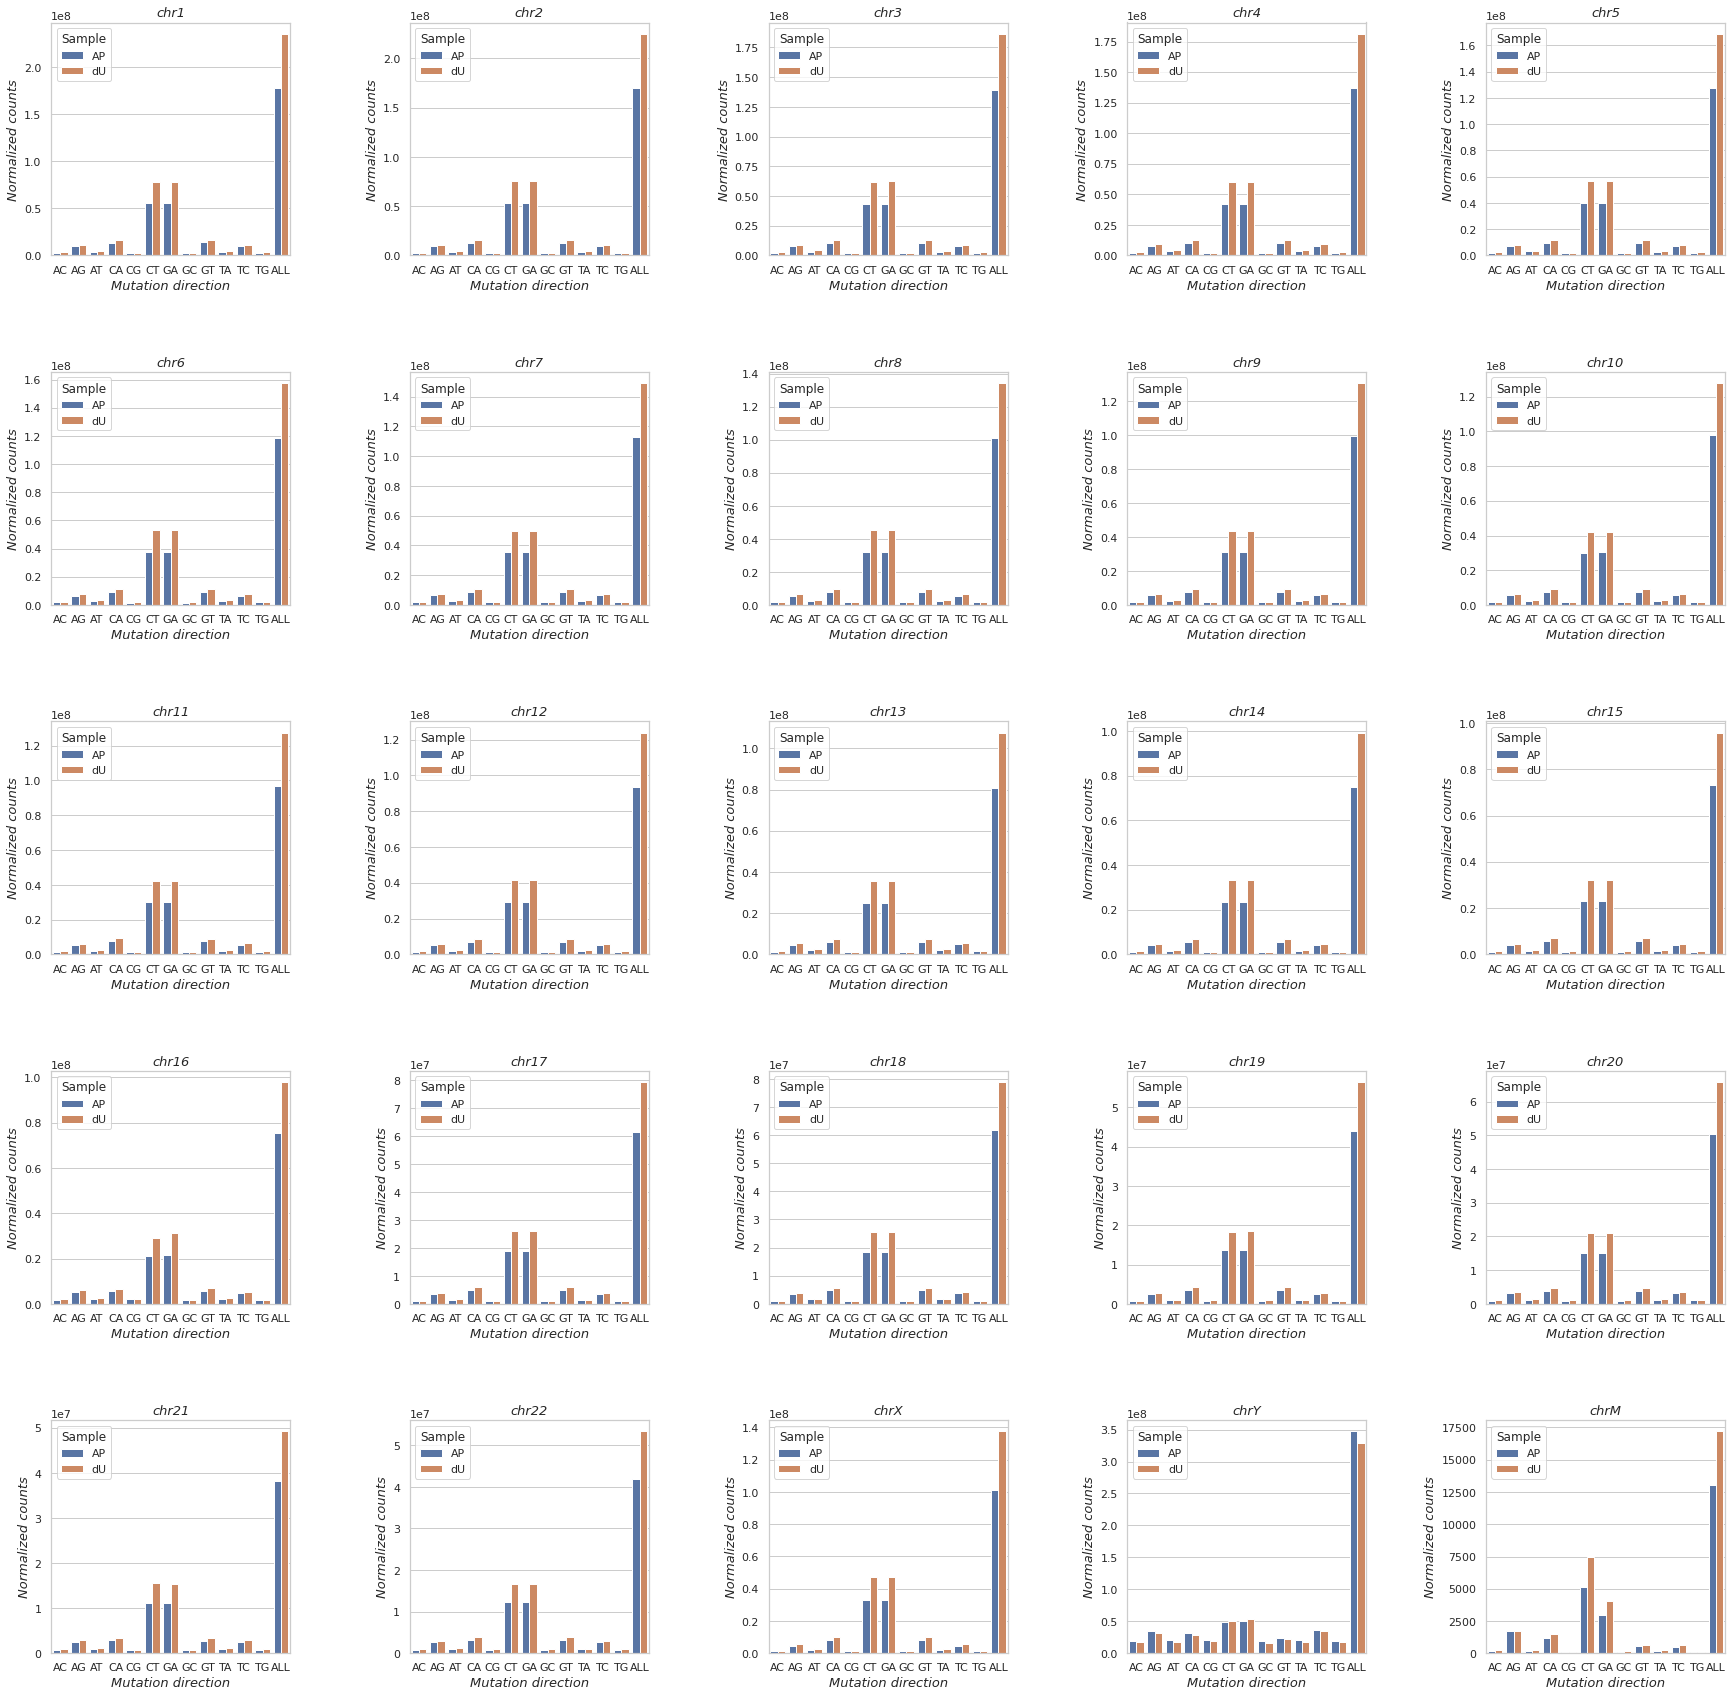

In [257]:
fig,ax = plt.subplots(5,5,figsize=(6*5,6*5))

for index,chroms in enumerate([str(i) for i in range(1,23)] + ['X','Y','M']):
    row = int(index/5)
    col = index%5
    Chr_name = 'chr%s' % chroms
    # fig
    sns.barplot(
        x = 'Mutation',
        y = 'NormCounts',
        hue = 'Sample',
        data=df_final[df_final.Chr == Chr_name],
        ci=None,
        ax = ax[row,col]
    )
    ax[row,col].set_xlabel('Mutation direction', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
    ax[row,col].set_ylabel('Normalized counts', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
    ax[row,col].set_title(Chr_name,fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
plt.savefig('./20201112-MutationCountsPerChr——293T-bat_GBEmini-dU-RNF2-All-PD_rep1_AND_293T-bat_GBEmini-AP-RNF2-All-PD_rep1_hg38.MAPQ20.pdf')